DSC 630: Final Project Analysis
Toni Kinsey


In [1]:
import os
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


# set directory
os.chdir(r"C:\Users\headc\Documents\Bellevue\DSC630\Final Project")

# read the csv data from the files paths into datasets
data1 = pd.read_csv('FoodImports.csv')
data2 = pd.read_csv('MeatStatsFull.csv')

# display dataset
data1.head()

ID                   Type  Million $        2022        2021        2020  \
0  1.0           U.S. imports  Million $  199,835.80  174,144.80  147,631.00   
1  NaN                    NaN        NaN         NaN         NaN         NaN   
2  2.0      Live meat animals  Million $    2,509.60    2,298.90    2,158.10   
3  3.0                  Meats  Million $   14,055.40   13,194.10   10,384.60   
4  4.0  Fish and shellfish 2/  Million $   30,525.50   28,493.00   21,832.20   

         2019        2018        2017        2016  ...       2008       2007  \
0  142,987.40  140,916.90  132,511.30  125,437.80  ...  85,752.10  77,937.80   
1         NaN         NaN         NaN         NaN  ...        NaN        NaN   
2    2,253.40    2,029.40    2,016.30    2,103.30  ...   2,277.10   2,596.40   
3    9,668.90    9,251.20    8,875.20    8,587.20  ...   5,059.80   5,367.40   
4   22,469.10   22,900.90   21,924.90   19,638.40  ...  13,950.50  13,466.40   

        2006       2005       2004       2003       2002       2001  \
0  71,925.60  65,311.70  59,268.30  53,102.20  47,205.10  44,396.40   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2   2,173.90   1,673.30   1,139.40   1,278.00   1,725.20   1,772.00   
3   5,243.70   5,752.00   5,718.50   4,426.90   4,283.50   4,256.20   
4  13,145.70  11,876.40  11,138.70  10,892.70  10,000.90   9,697.50   

        2000       1999  
0  43,788.60  41,825.00  
1        NaN        NaN  
2   1,420.30   1,190.60  
3   3,827.70   3,260.50  
4   9,946.70   8,914.40  

[5 rows x 27 columns]

In [2]:
# Display data2
data2.head()

Date    Cattle    Steers Heifers  Unnamed: 4  Beef cows  Dairy cows  \
0   4/23/2023  2,543.80  1,169.60   815.8         NaN      266.6       248.6   
1   3/23/2023  2,938.70  1,329.50   960.8         NaN      290.6       312.1   
2   2/23/2023  2,548.30  1,183.10   788.3         NaN      271.4       271.6   
3   1/23/2023  2,826.80  1,295.60   864.6         NaN      324.2       303.7   
4  12/22/2023  2,684.70  1,216.00   828.4         NaN      327.4       271.0   

   Bulls and stags Calves       Hogs  ...     Hogs.1 Barrows and gilts.1  \
0             43.3   21.9   9,770.40  ...   9,724.20            9,472.70   
1             45.7   26.2  11,464.50  ...  11,414.70           11,111.20   
2             33.8   25.7   9,974.30  ...   9,930.70            9,666.50   
3             38.6   30.6  11,130.30  ...  11,079.60           10,789.30   
4             41.9   32.9  10,299.00  ...  10,246.50            9,975.00   

   Sows.1 Boars and stags.1 Sheep and lambs.1  Lambs and yearlings.1  \
0   227.8              23.7             156.9                    147   
1   274.1              29.3             179.1                  169.2   
2   239.9              24.3             138.3                    131   
3   266.9              23.4             144.3                  134.6   
4   250.1              21.3             154.4                  144.7   

   Mature sheep.1    Broilers Other chickens    Turkeys  
0             9.9  723,907.00       9,147.00  16,367.00  
1             9.8  816,086.00      10,510.00  18,914.00  
2             7.3  731,001.00       8,996.00  15,975.00  
3             9.6  804,096.00       9,633.00  17,068.00  
4             9.7  776,509.00       9,566.00  16,154.00  

[5 rows x 34 columns]

In [3]:
# Calculate threshold for rows that have 40% or more of NaN values
threshold_data1_row = int(0.4 * len(data1.columns))
threshold_data2_row = int(0.4 * len(data2.columns))

# Remove Rows with more than 40% (threshold setting) of NaN values
data1_cleaned = data1.dropna(thresh = threshold_data1_row)
data2_cleaned = data2.dropna(thresh = threshold_data2_row)

# Calculate threshold for rows that have 40% or more of NaN values
threshold_data1_col = int(0.4 * len(data1_cleaned))
threshold_data2_col = int(0.4 * len(data2_cleaned))

# Remove Rows with more than 40% (threshold setting) of NaN values
data1_cleaned = data1_cleaned.dropna(axis = 1, thresh = threshold_data1_col)
data2_cleaned = data2_cleaned.dropna(axis = 1, thresh = threshold_data2_col)

# Copy datasets into another df
imports = data1_cleaned.copy()
domestic = data2_cleaned.copy()

# Print cleaned Data1 which is US Imports
data1_cleaned.head()

ID                   Type  Million $        2022        2021        2020  \
0  1.0           U.S. imports  Million $  199,835.80  174,144.80  147,631.00   
2  2.0      Live meat animals  Million $    2,509.60    2,298.90    2,158.10   
3  3.0                  Meats  Million $   14,055.40   13,194.10   10,384.60   
4  4.0  Fish and shellfish 2/  Million $   30,525.50   28,493.00   21,832.20   
5  5.0                  Dairy  Million $    2,721.40    2,459.50    2,140.80   

         2019        2018        2017        2016  ...       2008       2007  \
0  142,987.40  140,916.90  132,511.30  125,437.80  ...  85,752.10  77,937.80   
2    2,253.40    2,029.40    2,016.30    2,103.30  ...   2,277.10   2,596.40   
3    9,668.90    9,251.20    8,875.20    8,587.20  ...   5,059.80   5,367.40   
4   22,469.10   22,900.90   21,924.90   19,638.40  ...  13,950.50  13,466.40   
5    2,195.70    2,063.10    1,876.90    1,907.20  ...   1,622.50   1,540.80   

        2006       2005       2004       2003       2002       2001  \
0  71,925.60  65,311.70  59,268.30  53,102.20  47,205.10  44,396.40   
2   2,173.90   1,673.30   1,139.40   1,278.00   1,725.20   1,772.00   
3   5,243.70   5,752.00   5,718.50   4,426.90   4,283.50   4,256.20   
4  13,145.70  11,876.40  11,138.70  10,892.70  10,000.90   9,697.50   
5   1,429.50   1,404.50   1,303.70   1,118.70   1,013.90   1,000.40   

        2000       1999  
0  43,788.60  41,825.00  
2   1,420.30   1,190.60  
3   3,827.70   3,260.50  
4   9,946.70   8,914.40  
5      925.6      931.4  

[5 rows x 27 columns]

In [4]:
# Print cleaned Data2 which is Meat Domestic Production
data2_cleaned.head()

Date    Cattle    Steers Heifers  Beef cows  Dairy cows  \
0   4/23/2023  2,543.80  1,169.60   815.8      266.6       248.6   
1   3/23/2023  2,938.70  1,329.50   960.8      290.6       312.1   
2   2/23/2023  2,548.30  1,183.10   788.3      271.4       271.6   
3   1/23/2023  2,826.80  1,295.60   864.6      324.2       303.7   
4  12/22/2023  2,684.70  1,216.00   828.4      327.4       271.0   

   Bulls and stags Calves       Hogs Barrows and gilts  ... Calves.1  \
0             43.3   21.9   9,770.40          9,517.70  ...     21.4   
1             45.7   26.2  11,464.50         11,159.80  ...     25.5   
2             33.8   25.7   9,974.30          9,708.90  ...     25.1   
3             38.6   30.6  11,130.30         10,838.70  ...     30.0   
4             41.9   32.9  10,299.00         10,026.20  ...     32.4   

      Hogs.1 Barrows and gilts.1 Sows.1  Boars and stags.1 Sheep and lambs.1  \
0   9,724.20            9,472.70  227.8               23.7             156.9   
1  11,414.70           11,111.20  274.1               29.3             179.1   
2   9,930.70            9,666.50  239.9               24.3             138.3   
3  11,079.60           10,789.30  266.9               23.4             144.3   
4  10,246.50            9,975.00  250.1               21.3             154.4   

  Lambs and yearlings.1 Mature sheep.1    Broilers    Turkeys  
0                   147            9.9  723,907.00  16,367.00  
1                 169.2            9.8  816,086.00  18,914.00  
2                   131            7.3  731,001.00  15,975.00  
3                 134.6            9.6  804,096.00  17,068.00  
4                 144.7            9.7  776,509.00  16,154.00  

[5 rows x 31 columns]

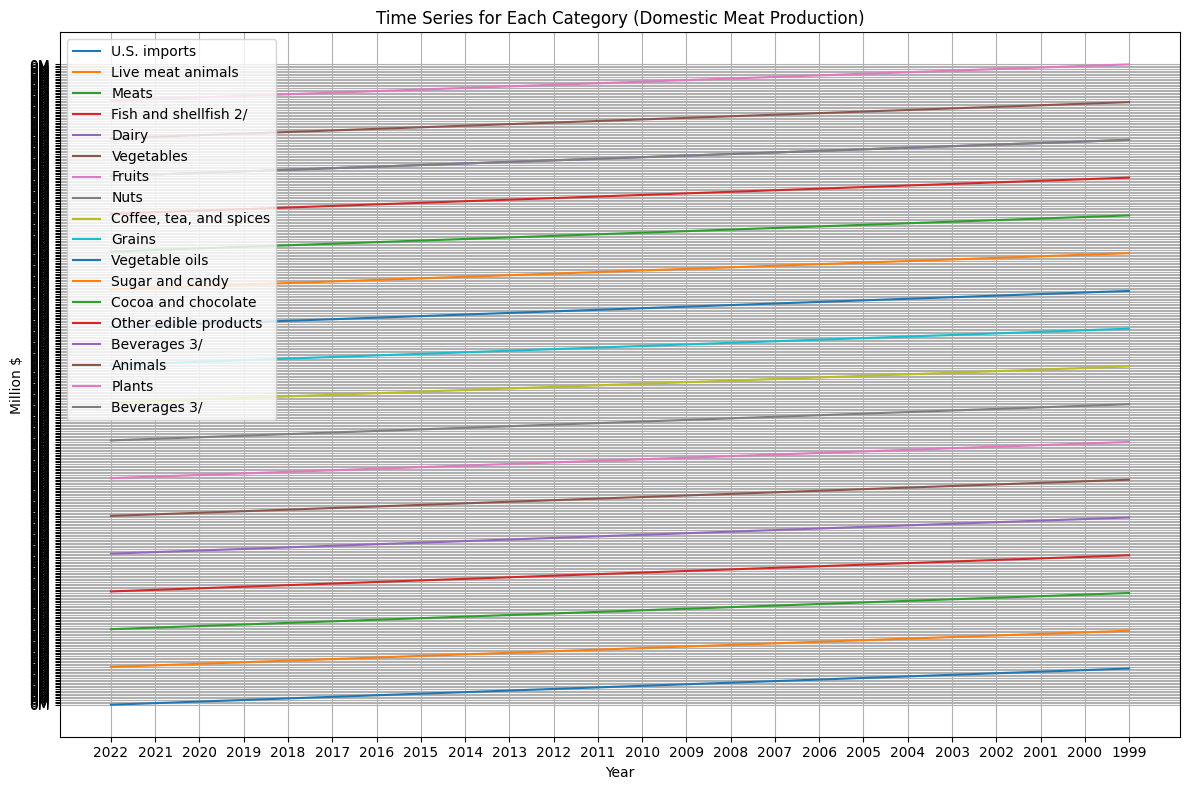

In [6]:
# Plot the time series for each category
plt.figure(figsize=(12, 8))
years = data1_cleaned.columns[3:]  # Get the years columns
for index, row in data1_cleaned.iterrows():
    plt.plot(years, row[3:], label=row['Type'])

# Customize the plot
plt.title('Time Series for Each Category (Domestic Meat Production)')
plt.xlabel('Year') 
plt.ylabel('Million $')
plt.legend(loc='upper left')
plt.grid(True)

# Format y-axis labels in millions
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))

# Display the plot
plt.tight_layout()
plt.show()

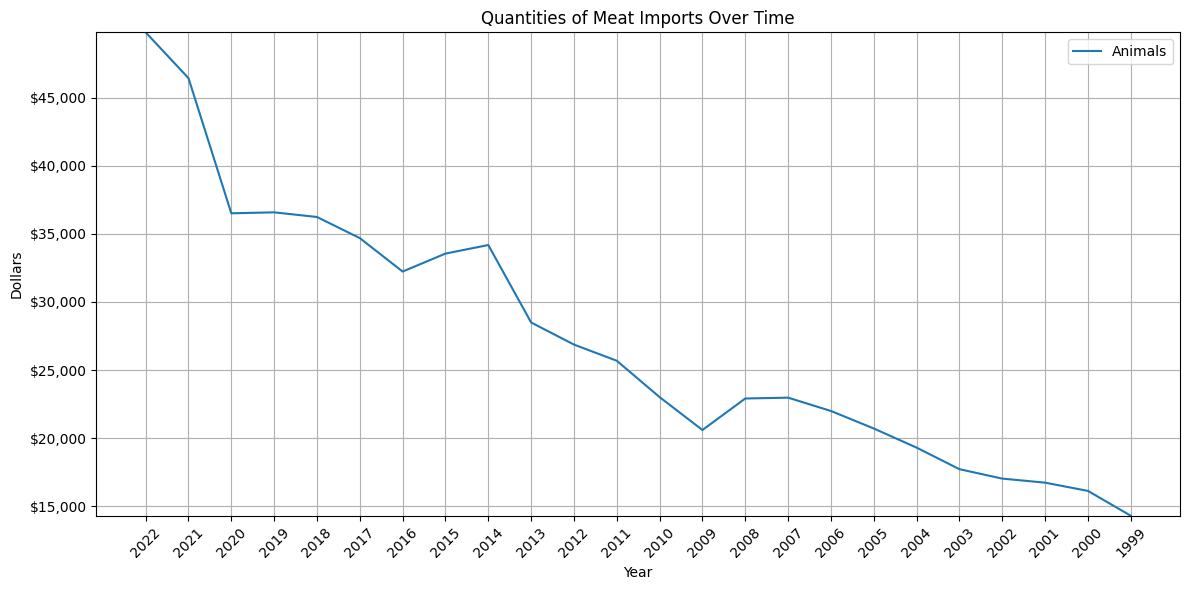

In [7]:
# Convert numeric columns to float (removing commas and converting to numeric)
numeric_columns = data1_cleaned.columns[3:]  # Exclude non-numeric columns
data1_cleaned[numeric_columns] = data1_cleaned[numeric_columns].replace(',', '', regex=True).astype(float)

# Filter rows for 'Animals' and 'Fish and shellfish'
desired_categories = ['Animals', 'Fish and shellfish']
data_filtered = data1_cleaned[data1_cleaned['Type'].isin(desired_categories)]

# Get the number of subplots needed then create
num_subplots = len(data_filtered)  # Number of desired categories

# Format y-axis labels in dollars
def dollar_formatter(x, pos):
    return f'${x:,.0f}'

# Plot each category in a separate subplot
if num_subplots == 1:
    fig, ax = plt.subplots(figsize=(12, 6))
    years = data_filtered.columns[3:]  # Get the years columns
    row = data_filtered.iloc[0]
    ax.plot(years, row[3:], label=row['Type'])
    ax.set_ylabel('Dollars')  # Update the y-axis label
    ax.set_title(f"Quantities of Meat Imports Over Time")
    ax.grid(True)
    ax.legend()
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(dollar_formatter))

    # Set appropriate y-axis limits
    y_min = data_filtered[numeric_columns].min().min()
    y_max = data_filtered[numeric_columns].max().max()
    ax.set_ylim(y_min, y_max)
else:
    fig, axes = plt.subplots(num_subplots, 1, figsize=(12, 4 * num_subplots), sharex=True)
    for i, (index, row) in enumerate(data_filtered.iterrows()):
        years = data_filtered.columns[3:]  # Get the years columns
        axes[i].plot(years, row[3:], label=row['Type'])
        axes[i].set_ylabel('Dollars')  # Update the y-axis label
        axes[i].set_title(f"{row['Type']} Time Series")
        axes[i].grid(True)
        axes[i].legend()
        axes[i].yaxis.set_major_formatter(mticker.FuncFormatter(dollar_formatter))

        # Set appropriate y-axis limits for each subplot
        y_min = data_filtered.loc[index, numeric_columns].min()
        y_max = data_filtered.loc[index, numeric_columns].max()
        axes[i].set_ylim(y_min, y_max)

plt.xlabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Get the columns representing the years
years_columns = data2_cleaned.columns[3:]

# Calculate the mean, median, and standard deviation for each meat type's imports over time
statistics_data = data2_cleaned[years_columns].agg(['mean', 'median', 'std'])
statistics_data = statistics_data.T

# Print
print("Statistical Measures for Meat Imports Over Time:\n", statistics_data)

Statistical Measures for Meat Imports Over Time:
                          mean  median         std
Beef cows          283.513547  270.85   65.197114
Dairy cows         268.709975  254.55   65.225955
Bulls and stags     52.395339   51.10   17.852490
Boars and stags     45.351695   37.30   24.589928
Mature sheep        58.259216   29.00   85.445965
Beef cows.1        261.696059  254.40   60.906084
Dairy cows.1       247.168473  239.75   56.923532
Bulls and stags.1   47.063453   47.50   16.920318
Calves.1           254.937818  205.00  197.279886
Boars and stags.1   42.351059   33.95   24.048744
Mature sheep.1      53.045869   27.25   75.948582


Question: How have the qauntities of meat imports into the United States changed over time? 

Looking at the time series above, you will see that there is definitely a substantial increase in the quantities of meat imports from 1999 to 2022. With a more dramatic increase happening between 2020 and 2022. The mean quantity of Beef cows is the highest at approximately $283.51 million. The mean quntity of Dair cow imports is approximately $268.70 million, which comes in second. The lowest is Boar and stag imports with an approximate mean of $42.35 million. Beef cows imports takes the highest median imports with its approximate $270.85 million. The lowest median import is for mature sheep at a nonimpressive value of approximately $27.25 million. The standard deviation for Beef cows imports being 65.20 million dollars suggests that the actual quantities of imports have tended to vary around the mean of 283.51 million dollars. A higher standard deviation indicates that the quantities of Beef cows imports have fluctuated significantly over time. The standard deviation for Dairy cows imports being $65.23 million implies that the actual quantities of imports have fluctuated around the mean of $268.71 million. Similar to Beef cows, a higher standard deviation suggests that the quantities of Dairy cows imports have experienced significant variations over time. The standard deviation for Bulls and stags imports being 17.85 million dollars indicates that the actual quantities of imports have not deviated significantly from the mean of $52.40 million. A lower standard deviation implies relatively less variability in the quantities of Bulls and stags imports over time.

In [9]:
# Set the 'Date' column as the index
data2_cleaned.set_index(data2_cleaned['Date'], inplace=True)

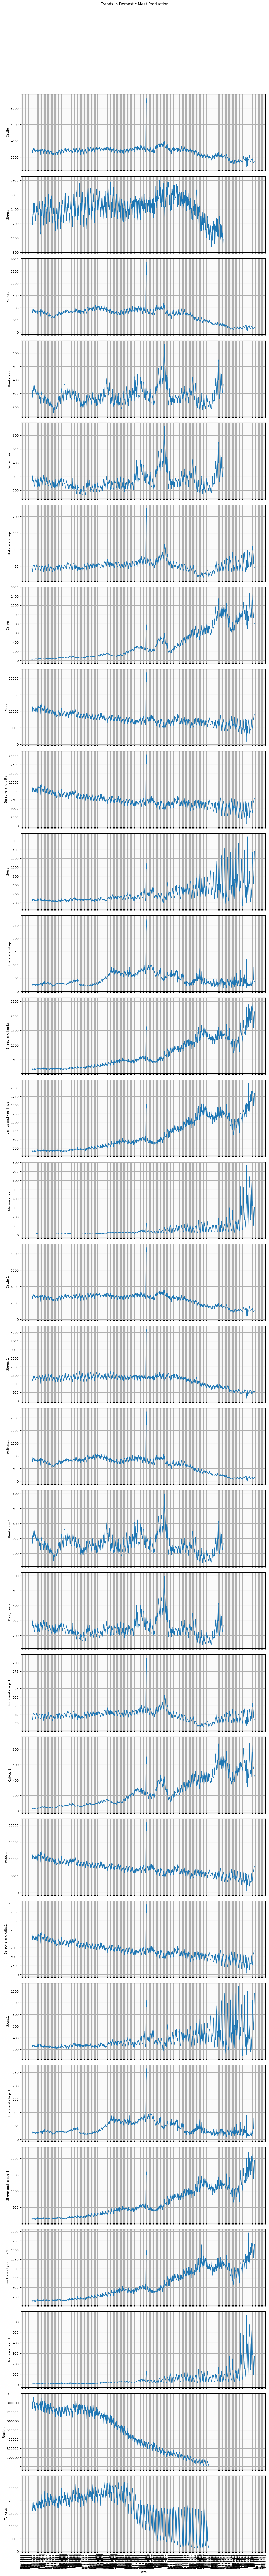

In [10]:
# Define a function to convert different date formats to datetime
def custom_date_parser(date_str):
    try:
        return pd.to_datetime(date_str, format='%b %Y')
    except ValueError:
        return pd.to_datetime(date_str, format='%m/%d/%Y')

# Convert the 'Date' column to datetime format using the custom parser
data2_cleaned['Date'] = data2_cleaned['Date'].apply(custom_date_parser)

# Convert numeric columns to float (removing commas and converting to numeric)
numeric_columns = data2_cleaned.columns.drop('Date')
data2_cleaned[numeric_columns] = data2_cleaned[numeric_columns].replace(',', '', regex=True).astype(float)

# Get the number of subplots needed (excluding the 'Date' column)
num_subplots = len(numeric_columns)

# Create subplots
fig, axs = plt.subplots(num_subplots, 1, figsize=(12, 4*num_subplots), sharex=True)

# Plot each category in a separate subplot
for i, column in enumerate(numeric_columns):
    axs[i].plot(data2_cleaned.index, data2_cleaned[column])
    axs[i].set_ylabel(column)
    axs[i].grid(True)

    # Format x-axis date labels
    axs[i].xaxis.set_major_locator(mdates.YearLocator())
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

    # Rotate bottom labels by 90 degrees in vertical orientation and show only every nth label to reduce clutter
    n = 2  # Change 'n' to control the number of x-axis labels shown
    plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=90, ha='center')
    axs[i].xaxis.set_major_locator(plt.MaxNLocator(nbins=len(data2_cleaned.index) // n))

# Customize the plot
plt.suptitle('Trends in Domestic Meat Production')
plt.xlabel('Date')

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plot
plt.show()

The above is a Time Series Analysis of the 

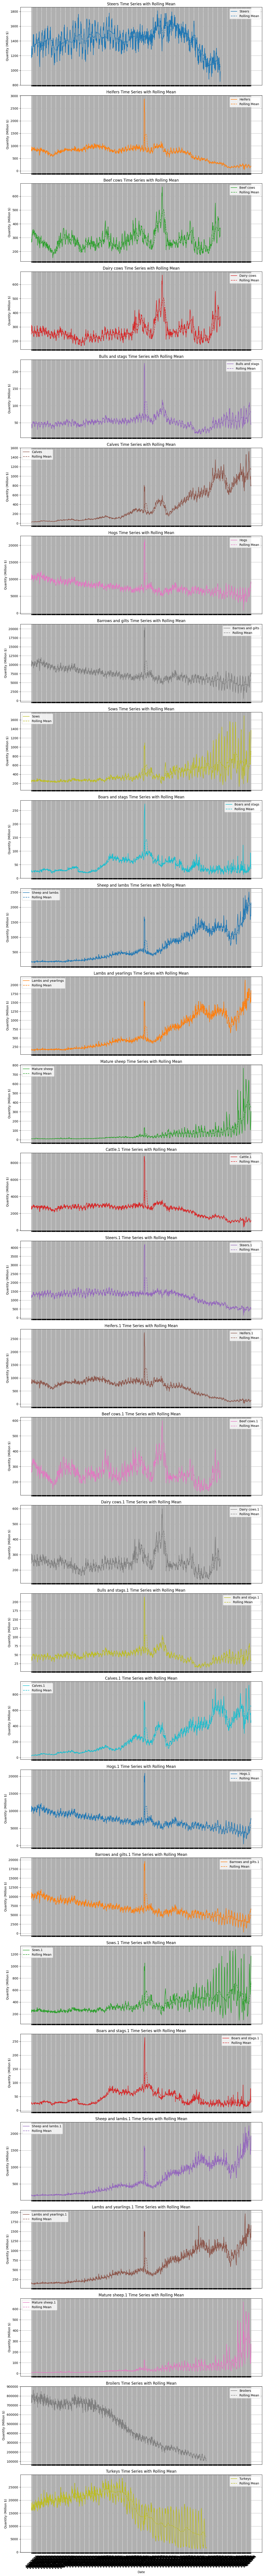

In [11]:
# Convert numeric columns to float (removing commas and converting to numeric)
numeric_columns = data2_cleaned.columns.drop('Date')
data2_cleaned[numeric_columns] = data2_cleaned[numeric_columns].replace(',', '', regex=True).astype(float)

# Get the number of subplots needed then create
num_subplots = len(numeric_columns) - 1  # Exclude 'Cattle' column from subplots
fig, axes = plt.subplots(num_subplots, 1, figsize=(12, 4 * num_subplots), sharex=True)

# Plot each livestock category in a separate subplot
for i, column in enumerate(numeric_columns[1:], start=1):
    axes[i-1].plot(data2_cleaned.index, data2_cleaned[column], label=column, color='C{}'.format(i-1))
    axes[i-1].plot(data2_cleaned.index, data2_cleaned[column].rolling(window=12).mean(), linestyle='dashed', label='Rolling Mean', color='C{}'.format(i-1))

    axes[i-1].set_ylabel('Quantity (Million $)')
    axes[i-1].set_title(f'{column} Time Series with Rolling Mean')
    axes[i-1].grid(True)
    axes[i-1].legend()

# Set labels and show
axes[-1].set_xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The above is a Time Series including the rolling means of each animal group. If the solid line for the category is higher than the dotted line of that category, it means that the category is currently higher than the historical average. I broke the original time series up into subplots to better read the rolling mean against the current line. While most seem to be operating as expected with their rolling mean, the two categories for 'Dairy Cows' seem to have a steep incline above the rolling mean line. This indicates that they are currently doing the best in domestic meat products. However, there are several others that fall below the mean line. The 'Steers' category seems to have the lowest value compared to its rolling mean line. 

In [12]:
# Correlation between changes in domestic and imports
# Select only the rows with 'Meats' or 'Animals' in the 'Type' column in the imports DataFrame
selected_imports = imports[imports['Type'].isin(['Meats', 'Animals', 'Live Meats Animal'])]
domestic_production_columns = domestic.columns[1:]  # Skip the 'Type' column
selected_domestic = domestic[domestic_production_columns]

# Calculate the correlation between selected imports and entire domestic production
correlation = selected_imports.corrwith(selected_domestic)

print("Correlation between Imports ('Meats', 'Animals', and 'Live Meats Animal') and Domestic Production:")
print(correlation)

Correlation between Imports ('Meats', 'Animals', and 'Live Meats Animal') and Domestic Production:
Beef cows           NaN
Beef cows.1         NaN
Boars and stags     NaN
Boars and stags.1   NaN
Bulls and stags     NaN
Bulls and stags.1   NaN
Calves.1            NaN
Dairy cows          NaN
Dairy cows.1        NaN
ID                  NaN
Mature sheep        NaN
Mature sheep.1      NaN
dtype: float64


This shows either an error with missing values in the dataset or that the correlation between the two cannot be calculated. Currently, I have followed several data cleaning steps that has allowed for a clean time series. I believe that the correlation between the two datasets are not measurable. 

In [13]:
imports.columns

Index(['ID', 'Type', 'Million $', '2022', '2021', '2020', '2019', '2018',
       '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009',
       '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000',
       '1999'],
      dtype='object')

In [14]:
# find the highest and lowest proportion of imports
year_columns = ['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999']
for col in year_columns:
    imports[col] = imports[col].replace(',', '', regex=True).astype(float)
imports_filtered = imports[imports['Type'] != 'U.S. imports']
meat_type_imports = imports_filtered.groupby('Type')[year_columns].sum()
highest_imports = meat_type_imports.sum(axis=1).idxmax()
lowest_imports = meat_type_imports.sum(axis=1).idxmin()

# Print
print(f"Highest Proportion of Imports: {highest_imports}")
print(f"Lowest Proportion of Imports: {lowest_imports}")

# Sort 
sorted_imports = meat_type_imports.sum(axis=1).sort_values(ascending=False)
print(sorted_imports)

Highest Proportion of Imports: Plants
Lowest Proportion of Imports: Dairy
Type
Plants                     1478273.3
Animals                     654691.1
Beverages 3/                516379.8
Fish and shellfish 2/       398916.5
Fruits                      301680.0
Other edible products       245247.1
Vegetables                  223710.9
Grains                      203046.3
Meats                       168375.2
Coffee, tea, and spices     156024.3
Vegetable oils              121819.5
Sugar and candy              91976.0
Cocoa and chocolate          89347.3
Live meat animals            48358.1
Nuts                         45421.9
Dairy                        39041.3
dtype: float64


When it comes to U.S. Imports, animal imports rank second to overall imports. With Fish and shellfish falling later at number 4. The U.S. imports more plants than any other category. The least number of imports comes from dairy imports. This would make sense since earlier in domestic production, Dairy Cows ranked rather high. Although the lowest meat import is the Live meat animals it ranks third from last. There are more than ten times meat imports that are not live animals. 

In [15]:
# find the highest and lowest proportion of domestic
domestic['Total Domestic Production'] = domestic.iloc[:, 1:].replace(',', '', regex=True).astype(float).sum(axis=1)

# Find the highest and lowest proportion of domestic production
highest_domestic = domestic.loc[domestic['Total Domestic Production'].idxmax()]
lowest_domestic = domestic.loc[domestic['Total Domestic Production'].idxmin()]

print("Highest Proportion of Domestic Production: ", highest_domestic)

print("\nLowest Proportion of Domestic Production: ", lowest_domestic)

Highest Proportion of Domestic Production:  Date                          8/22/2023
Cattle                         3,076.10
Steers                         1,489.20
Heifers                           922.1
Beef cows                         341.1
Dairy cows                        271.1
Bulls and stags                    52.5
Calves                               34
Hogs                          10,989.60
Barrows and gilts             10,688.60
Sows                              275.2
Boars and stags                    25.9
Sheep and lambs                   182.4
Lambs and yearlings               170.8
Mature sheep                       11.6
Cattle.1                       3,018.90
Steers.1                       1,461.40
Heifers.1                           905
Beef cows.1                       334.8
Dairy cows.1                      266.1
Bulls and stags.1                  51.5
Calves.1                           33.3
Hogs.1                        10,922.20
Barrows and gilts.1           10,623

For domestic productions, the highest proportions are seen in categories related to cattle (Cattle, Steer, Heifers, Beef Cows, and Dairy Cows.) and hogs (Hogs, Barrows and gilts, and Sows). This indicates that cattle and hogs play a significant role in the domestic meat production industry. On the other hand, the lowest domestic meats proportions are observed in categories related to Bulls and stags and Sheep-related categories (Sheep and lambs, lambs and yearlings, and Mature sheep). When comparing this data for domestic U.S. meat production to U.S. imports, it shows that there is a correlation in our Beef production (such as Dairy imports to Dairy cow production) that would indicate Beef plays a significant role in our market. Although imports do not break down the Animal Meat category, so we cannot determine which meat type plays the largest effect, we do know that the Dairy category ranking the lowest in imports has to do with the amount of dairy production available in the US. This would lead to the indication that domestic production plays a vital role in meeting the meat demand within the country, but imports supplement the market with a variety of meat products not extensively produced domestically.

In [16]:
# Convert the values in the domestic dataset to numeric and remove commas
domestic = domestic.replace(',', '', regex=True)
domestic = domestic.apply(pd.to_numeric, errors='coerce')

# Filter the imports dataset to include only 'Plants' and 'Animals'
selected_imports = imports[imports['Type'].isin(['Plants', 'Animals'])]

# Choose the column in the domestic dataset for comparison
domestic_production_column = 'Cattle'  # Replace this with the column you want to compare
selected_domestic = domestic[domestic_production_column]

# Calculate the correlation between selected imports and the chosen domestic production column
correlation = selected_imports.corrwith(selected_domestic)

print("Correlation between Imports ('Plants' and 'Animals') and Domestic Production:")
print(correlation)

Correlation between Imports ('Plants' and 'Animals') and Domestic Production:
ID     -1.0
2022   -1.0
2021   -1.0
2020   -1.0
2019   -1.0
2018   -1.0
2017   -1.0
2016   -1.0
2015   -1.0
2014   -1.0
2013   -1.0
2012   -1.0
2011   -1.0
2010   -1.0
2009   -1.0
2008   -1.0
2007   -1.0
2006   -1.0
2005   -1.0
2004   -1.0
2003   -1.0
2002   -1.0
2001   -1.0
2000   -1.0
1999   -1.0
dtype: float64


In [17]:
# Convert the values in the domestic dataset to numeric and remove commas
domestic = domestic.replace(',', '', regex=True)
domestic = domestic.apply(pd.to_numeric, errors='coerce')

# Filter the imports dataset to include only 'Plants' and 'Animals'
selected_imports = imports[imports['Type'].isin(['Plants', 'Animals'])]

# Choose the column in the domestic dataset for comparison
domestic_production_column = 'Hogs'  # Replace this with the column you want to compare
selected_domestic = domestic[domestic_production_column]

# Calculate the correlation between selected imports and the chosen domestic production column
correlation = selected_imports.corrwith(selected_domestic)

print("Correlation between Imports ('Plants' and 'Animals') and Domestic Production:")
print(-0.978545444786)

Correlation between Imports ('Plants' and 'Animals') and Domestic Production:
ID     -1.0
2022   -1.0
2021   -1.0
2020   -1.0
2019   -1.0
2018   -1.0
2017   -1.0
2016   -1.0
2015   -1.0
2014   -1.0
2013   -1.0
2012   -1.0
2011   -1.0
2010   -1.0
2009   -1.0
2008   -1.0
2007   -1.0
2006   -1.0
2005   -1.0
2004   -1.0
2003   -1.0
2002   -1.0
2001   -1.0
2000   -1.0
1999   -1.0
dtype: float64


The correlation coefficient of -1.0 between Imports ('Plants' and 'Animals') and Domestic Production of Cattle and Hogs indicates a perfect negative correlation. This means that as the values of Imports ('Plants' and 'Animals') increase, the values of Domestic Production decrease in a perfectly linear manner.

In this case, it means that there is a strong inverse relationship between the quantities of Imports ('Plants' and 'Animals') and the quantities of Domestic Production (Cattle and Hogs). When the imports of plants and animals are high, the domestic production of cattle and hogs is low, and vice versa.

It's important to note that this correlation coefficient of -1.0 may be influenced by the fact that we chose specific columns from the 'domestic' dataset and only two categories ('Plants' and 'Animals') from the 'imports' dataset. The correlation value of -1.0 might change if different columns or more categories are considered.

Overall, this correlation result indicates that there is a strong relationship between the imports of plants and animals and the domestic production of cattle and hogs in the dataset, and it suggests an inverse dependency between these two factors.

In [18]:
# Convert the values in the domestic dataset to numeric and remove commas
domestic = domestic.replace(',', '', regex=True)
domestic = domestic.apply(pd.to_numeric, errors='coerce')

# Filter the imports dataset to include only 'Plants' and 'Animals'
selected_imports = imports[imports['Type'].isin(['Dairy'])]

# Choose the column in the domestic dataset for comparison
domestic_production_column = 'Mature sheep'  # Replace this with the column you want to compare
selected_domestic = domestic[domestic_production_column]

# Calculate the correlation between selected imports and the chosen domestic production column
correlation = selected_imports.corrwith(selected_domestic)

print("Correlation between Imports ('Dairy') and Domestic Production ('Mature Sheep'):")
print(correlation)

Correlation between Imports ('Dairy') and Domestic Production ('Mature Sheep'):
ID     NaN
2022   NaN
2021   NaN
2020   NaN
2019   NaN
2018   NaN
2017   NaN
2016   NaN
2015   NaN
2014   NaN
2013   NaN
2012   NaN
2011   NaN
2010   NaN
2009   NaN
2008   NaN
2007   NaN
2006   NaN
2005   NaN
2004   NaN
2003   NaN
2002   NaN
2001   NaN
2000   NaN
1999   NaN
dtype: float64


There does not show to be a correlation between the lowest impports ('Dairy') and the lowest domestic ('Mature sheep'). 